#### Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#### Import data


In [2]:
data = pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

#### Standardize data


In [4]:
ss = StandardScaler()
X = ss.fit_transform(X)

In [5]:
X = pd.DataFrame(X, columns=data.columns[:-1])
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-1.720542,-0.900681,1.032057,-1.341272,-1.312977
1,-1.697448,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.674353,-1.385353,0.337848,-1.398138,-1.312977
3,-1.651258,-1.506521,0.106445,-1.284407,-1.312977
4,-1.628164,-1.021849,1.263460,-1.341272,-1.312977


In [6]:
print(np.mean(X['SepalLengthCm']), np.std(X['SepalLengthCm']))
print(np.mean(X['SepalWidthCm']), np.std(X['SepalWidthCm']))
print(np.mean(X['PetalLengthCm']), np.std(X['PetalLengthCm']))
print(np.mean(X['PetalWidthCm']), np.std(X['PetalWidthCm']))

#The mean and standard deviation of each attribute
#Mean is close to zero and standard deviation is one

-4.736951571734001e-16 0.9999999999999999
-6.631732200427602e-16 1.0
3.315866100213801e-16 0.9999999999999998
-2.842170943040401e-16 1.0


#### Using PCA for 2D visualization

In [7]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)
X = pd.DataFrame(X, columns=['PC1', 'PC2'])
X.head()

,PC1,PC2
0,-2.816339,0.506051
1,-2.645527,-0.651799
2,-2.879481,-0.321036
3,-2.810934,-0.577363
4,-2.879884,0.670468


#### Visualisation of scatter plot

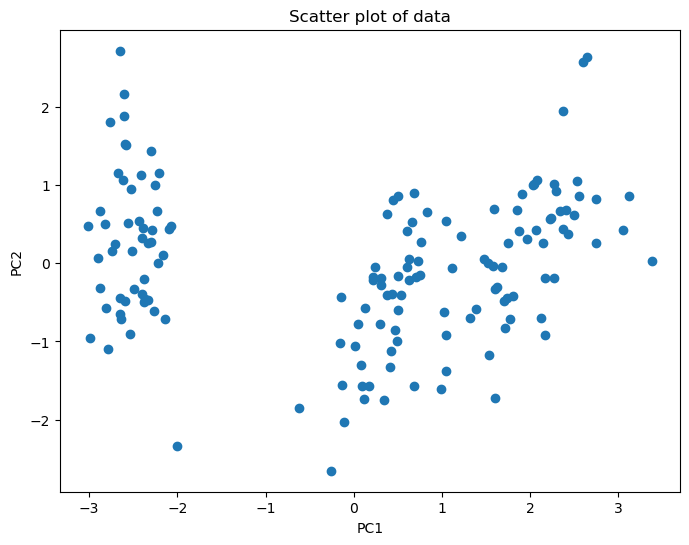

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(X['PC1'], X['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter plot of data')
plt.show()

#### Elbow method - Selecting optimal 'K'

In [9]:
sum_of_squared = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)  # Set n_init to 10
    kmeans.fit(X)
    sum_of_squared.append(kmeans.inertia_)  # sum of squared distances

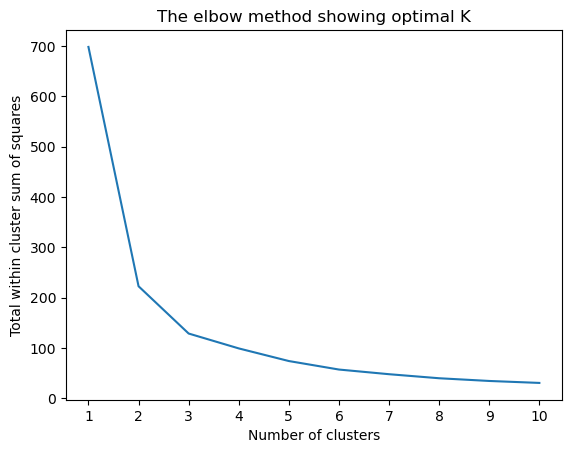

In [10]:
plt.plot(range(1, 11), sum_of_squared)
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Total within cluster sum of squares')
plt.title('The elbow method showing optimal K')
plt.show()